## Health Analytics - Predicting Stroke

In [6]:
import pandas as pd
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image  

In [8]:
## Read the stroke dataset
data = 'C:/Users/SK/Desktop/SK/NUS EBA/Semester 4/Health Analytics/Health Analytics/Workshop Dataset/Stroke.csv'
stroke = pd.read_csv(data)

In [9]:
## Explore the data
stroke.head(10)

id  gender   age  hypertension  heart_disease ever_married  \
0  30669    Male   3.0             0              0           No   
1  30468    Male  58.0             1              0          Yes   
2  16523  Female   8.0             0              0           No   
3  56543  Female  70.0             0              0          Yes   
4  46136    Male  14.0             0              0           No   
5  32257  Female  47.0             0              0          Yes   
6  52800  Female  52.0             0              0          Yes   
7  41413  Female  75.0             0              1          Yes   
8  15266  Female  32.0             0              0          Yes   
9  28674  Female  74.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0       children          Rural              95.12  18.0              NaN   
1        Private          Urban              87.96  39.2     never smoked   
2        Private          Urban             110.89  17.6              NaN   
3        Private          Rural              69.04  35.9  formerly smoked   
4   Never_worked          Rural             161.28  19.1              NaN   
5        Private          Urban             210.95  50.1              NaN   
6        Private          Urban              77.59  17.7  formerly smoked   
7  Self-employed          Rural             243.53  27.0     never smoked   
8        Private          Rural              77.67  32.3           smokes   
9  Self-employed          Urban             205.84  54.6     never smoked   

   stroke  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0

In [10]:
stroke.info() ## there is missing value for 'bmi' and 'smoking_status' variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [12]:
stroke.describe()

id           age  hypertension  heart_disease  \
count  43400.000000  43400.000000  43400.000000   43400.000000   
mean   36326.142350     42.217894      0.093571       0.047512   
std    21072.134879     22.519649      0.291235       0.212733   
min        1.000000      0.080000      0.000000       0.000000   
25%    18038.500000     24.000000      0.000000       0.000000   
50%    36351.500000     44.000000      0.000000       0.000000   
75%    54514.250000     60.000000      0.000000       0.000000   
max    72943.000000     82.000000      1.000000       1.000000   

       avg_glucose_level           bmi        stroke  
count       43400.000000  41938.000000  43400.000000  
mean          104.482750     28.605038      0.018041  
std            43.111751      7.770020      0.133103  
min            55.000000     10.100000      0.000000  
25%            77.540000     23.200000      0.000000  
50%            91.580000     27.700000      0.000000  
75%           112.070000     32.900000      0.000000  
max           291.050000     97.600000      1.000000

In [11]:
## Explore the missing value
stroke.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [10]:
print("percentage of missing BMI data = ", '%.2f'%(stroke['bmi'].isnull().sum()/len(stroke)*100), "%")
print("percentage of missing Smoking data = ", '%.2f'%(stroke['smoking_status'].isnull().sum()/len(stroke)*100), "%")

percentage of missing BMI data =  3.37 %
percentage of missing Smoking data =  30.63 %


In [13]:
## Drop id(identifier) and smoking_status(missing value) columns
stroke2 = stroke.drop(['id', 'smoking_status'], axis = 1)
stroke3 = stroke2.dropna()
stroke3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41938 entries, 0 to 43399
Data columns (total 10 columns):
gender               41938 non-null object
age                  41938 non-null float64
hypertension         41938 non-null int64
heart_disease        41938 non-null int64
ever_married         41938 non-null object
work_type            41938 non-null object
Residence_type       41938 non-null object
avg_glucose_level    41938 non-null float64
bmi                  41938 non-null float64
stroke               41938 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 3.5+ MB


In [13]:
stroke3.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64

In [14]:
## Investigate the correalation for continuous variables
corrData = stroke3.drop(["gender", "ever_married", "work_type","Residence_type", "stroke"], axis = 1)
corrData.head(10)

age  hypertension  heart_disease  avg_glucose_level   bmi
0   3.0             0              0              95.12  18.0
1  58.0             1              0              87.96  39.2
2   8.0             0              0             110.89  17.6
3  70.0             0              0              69.04  35.9
4  14.0             0              0             161.28  19.1
5  47.0             0              0             210.95  50.1
6  52.0             0              0              77.59  17.7
7  75.0             0              1             243.53  27.0
8  32.0             0              0              77.67  32.3
9  74.0             1              0             205.84  54.6

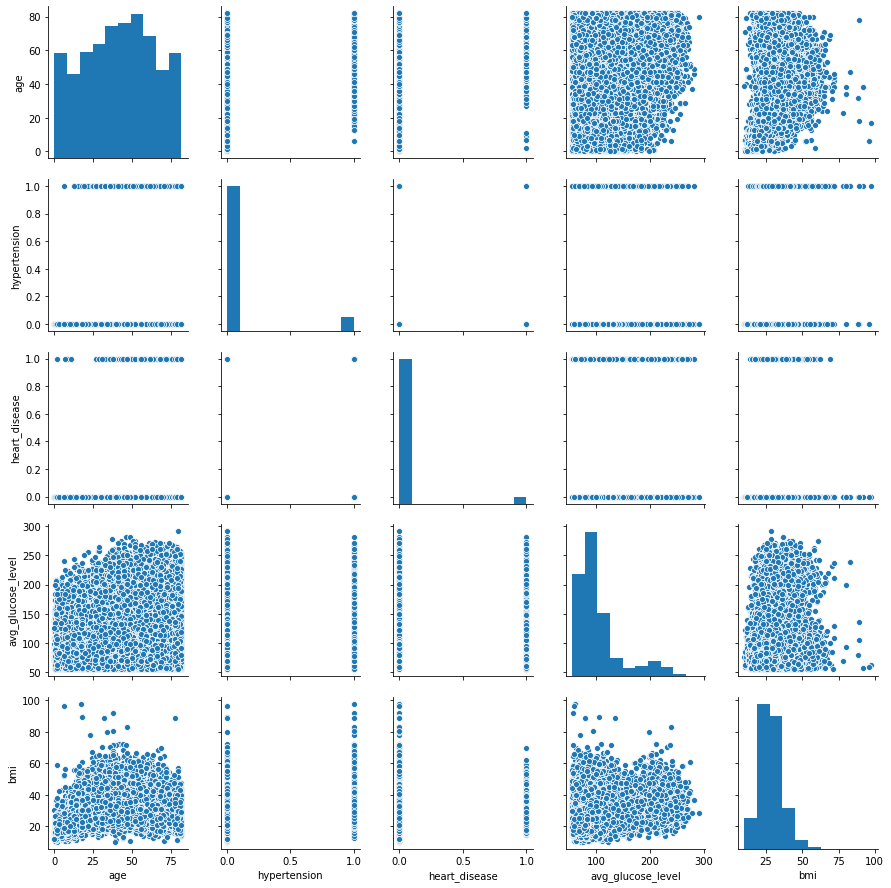

In [15]:
sns.pairplot(corrData)
plt.show()

In [16]:
## Transpose the data
corrDataT = corrData.values.T
corrDataT

array([[  3.  ,  58.  ,   8.  , ...,  82.  ,  40.  ,  82.  ],
       [  0.  ,   1.  ,   0.  , ...,   1.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [ 95.12,  87.96, 110.89, ...,  91.94,  99.16,  79.48],
       [ 18.  ,  39.2 ,  17.6 , ...,  28.9 ,  33.2 ,  20.6 ]])

In [17]:
corrMat = np.corrcoef(corrDataT)
corrMat

array([[1.        , 0.26844547, 0.24298009, 0.23231075, 0.35889719],
       [0.26844547, 1.        , 0.12080643, 0.15913042, 0.16122524],
       [0.24298009, 0.12080643, 1.        , 0.14355464, 0.05767724],
       [0.23231075, 0.15913042, 0.14355464, 1.        , 0.19129515],
       [0.35889719, 0.16122524, 0.05767724, 0.19129515, 1.        ]])

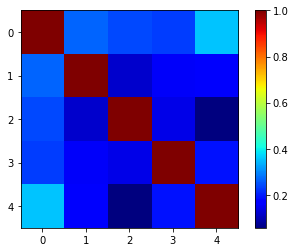

In [18]:
plt.imshow(corrMat, cmap = 'jet')
plt.colorbar()

In [35]:
## Check the number of "Yes/No" of the stroke patient (unbalance data)
stroke3['stroke'].value_counts()

0    41295
1      643
Name: stroke, dtype: int64

In [19]:
## Oversampling 
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [26]:
## Encode categorical variables
strokeDummy = pd.get_dummies(data=stroke3, columns=['gender', 'ever_married','work_type','Residence_type']
                            ,drop_first=True)
trainData = strokeDummy.drop(["stroke"] , axis = 1)
trainData.head(10)

age  hypertension  heart_disease  avg_glucose_level   bmi  gender_Male  \
0   3.0             0              0              95.12  18.0            1   
1  58.0             1              0              87.96  39.2            1   
2   8.0             0              0             110.89  17.6            0   
3  70.0             0              0              69.04  35.9            0   
4  14.0             0              0             161.28  19.1            1   
5  47.0             0              0             210.95  50.1            0   
6  52.0             0              0              77.59  17.7            0   
7  75.0             0              1             243.53  27.0            0   
8  32.0             0              0              77.67  32.3            0   
9  74.0             1              0             205.84  54.6            0   

   gender_Other  ever_married_Yes  work_type_Never_worked  work_type_Private  \
0             0                 0                       0                  0   
1             0                 1                       0                  1   
2             0                 0                       0                  1   
3             0                 1                       0                  1   
4             0                 0                       1                  0   
5             0                 1                       0                  1   
6             0                 1                       0                  1   
7             0                 1                       0                  0   
8             0                 1                       0                  1   
9             0                 1                       0                  0   

   work_type_Self-employed  work_type_children  Residence_type_Urban  
0                        0                   1                     0  
1                        0                   0                     1  
2                        0                   0                     1  
3                        0                   0                     0  
4                        0                   0                     0  
5                        0                   0                     1  
6                        0                   0                     1  
7                        1                   0                     0  
8                        0                   0                     0  
9                        1                   0                     1

In [27]:
x_train, x_test, y_train, y_test = train_test_split(trainData.values, stroke3['stroke'].values, 
                                                    test_size = 0.2, random_state=123)

In [28]:
## Perform Logistic Regression
LRModel = LogisticRegression()
LRModel.fit(x_train, y_train)

C:\Users\SK\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [30]:
predTrain1 = LRModel.predict(x_train)
predTest1 = LRModel.predict(x_test)
trainAccuracy = np.mean(predTrain1 == y_train)
testAccuracy = np.mean(predTest1 == y_test)

print ('Training Accuracy Percentage =', trainAccuracy*100)
print ('Testing Accuracy Percentage =', testAccuracy*100)

Training Accuracy Percentage = 98.4769001490313
Testing Accuracy Percentage = 98.42632331902719


In [31]:
## Confusion Matrix for Trainset
trainCM1=confusion_matrix(y_train,predTrain1)
print('True Negative ='+ str(trainCM1[0,0]))
print('False Negative ='+ str(trainCM1[1,0]))
print('True Positive ='+ str(trainCM1[1,1]))
print('False Positive ='+ str(trainCM1[0,1]))

True Negative =33039
False Negative =511
True Positive =0
False Positive =0


In [32]:
#True negative rate/Specificity=tn/(tn+fp)
print('Specificity =',trainCM1[0,0]/(trainCM1[0,0]+trainCM1[0,1]) )

Specificity = 1.0


In [33]:
## Confusion Matrix for Testset
testCM1=confusion_matrix(y_test,predTest1)
print('True Negative ='+ str(testCM1[0,0]))
print('False Negative ='+ str(testCM1[1,0]))
print('True Positive ='+ str(testCM1[1,1]))b
print('False Positive ='+ str(testCM1[0,1]))

True Negative =8256
False Negative =132
True Positive =0
False Positive =0


In [36]:
#True negative rate/Specificity=tn/(tn+fp)
print('Specificity =',testCM1[0,0]/(testCM1[0,0]+testCM1[0,1]) )

Specificity = 1.0


In [52]:
sm = SMOTE(random_state=123 , sampling_strategy = 'minority')
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

In [53]:
LRModel2 = LogisticRegression()
LRModel2.fit(x_train_res, y_train_res)

C:\Users\SK\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [54]:
predTrain2 = LRModel2.predict(x_train_res)
predTest2 = LRModel2.predict(x_test)
print('Training Accuracy Percentage =',metrics.accuracy_score(predTrain2, y_train_res)*100)
print('Testing Accuracy Percentage =',metrics.accuracy_score(predTest2, y_test)*100)

Training Accuracy Percentage = 79.00965525590968
Testing Accuracy Percentage = 76.28755364806867


In [55]:
## Confusion Matrix
trainCM2=confusion_matrix(y_train_res,predTrain2)
trainCM2

array([[25186,  7853],
       [ 6017, 27022]], dtype=int64)

In [56]:
print('True Negative ='+ str(trainCM2[0,0]))
print('False Negative ='+ str(trainCM2[1,0]))
print('True Positive ='+ str(trainCM2[1,1]))
print('False Positive ='+ str(trainCM2[0,1]))

True Negative =25186
False Negative =6017
True Positive =27022
False Positive =7853


In [57]:
#True negative rate/Specificity=tn/(tn+fp)
print('Specificity =',trainCM2[0,0]/(trainCM2[0,0]+trainCM2[0,1]) )
#similar

Specificity = 0.7623112079663428


In [58]:
## Try on Testset
testCM2=confusion_matrix(y_test,predTest2)
print('True Negative ='+ str(testCM2[0,0]))
print('False Negative ='+ str(testCM2[1,0]))
print('True Positive ='+ str(testCM2[1,1]))
print('False Positive ='+ str(testCM2[0,1]))

True Negative =6298
False Negative =31
True Positive =101
False Positive =1958


In [59]:
#True negative rate/Specificity=tn/(tn+fp)
print('Specificity =',testCM2[0,0]/(testCM2[0,0]+testCM2[0,1]) )
#similar

Specificity = 0.7628391472868217


### RIsk of Stroke by using Decision Tree

In [68]:
attributes = list(trainData.columns)

In [69]:
DT = DecisionTreeClassifier()
DT = DT.fit(x_train_res, y_train_res)

In [70]:
trainPredict = DT.predict(x_train_res)
testPredict = DT.predict(x_test)

In [71]:
print('Training Accuracy Percentage =',metrics.accuracy_score(trainPredict, y_train_res)*100)
print('Testing Accuracy Percentage =',metrics.accuracy_score(testPredict, y_test)*100)

Training Accuracy Percentage = 100.0
Testing Accuracy Percentage = 96.62613257033857


In [72]:
# Draw out the tree
data = io.StringIO()
export_graphviz(DT, out_file=data,  
                filled=True,feature_names = attributes,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(data.getvalue())  
graph.write_png('stroke.png')
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.495981 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.495981 to fit



In [73]:
#Try a smaller tree & repeat the steps
DT2 = DecisionTreeClassifier(max_depth=3)
DT2 = DT2.fit(x_train_res,y_train_res)
trainPredict2 = DT2.predict(x_train_res)
testPredict2 = DT2.predict(x_test)

In [74]:
print('Training Accuracy Percentage =',metrics.accuracy_score(trainPredict2, y_train_res)*100)
print('Testing Accuracy Percentage =',metrics.accuracy_score(testPredict2, y_test)*100)
#Training accuracy decreased
#Testing accuracy increases

Training Accuracy Percentage = 79.8510850812676
Testing Accuracy Percentage = 65.17644253695755


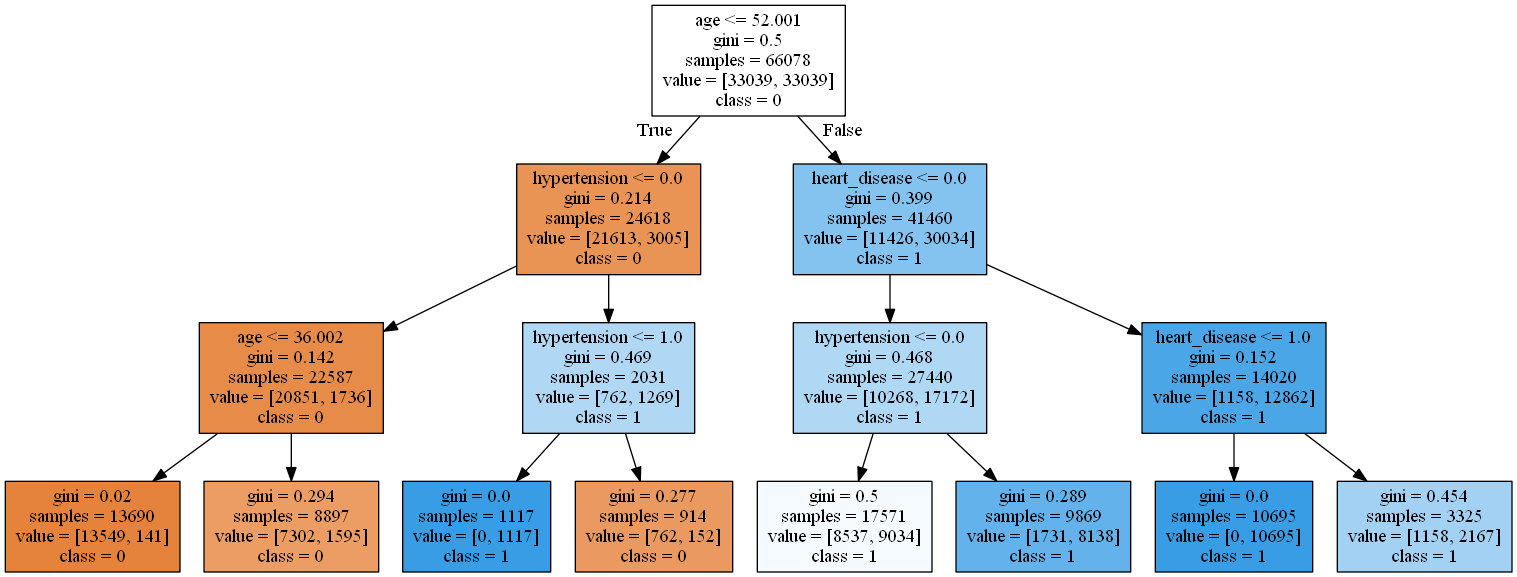

In [75]:
# Draw out the tree
data2 = io.StringIO()
export_graphviz(DT2, out_file=data2,  
                filled=True,feature_names = attributes,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(data2.getvalue())  
graph.write_png('stroke.png')
Image(graph.create_png())

In [76]:
trainCM2=confusion_matrix(y_train_res,trainPredict2)
trainCM2

array([[21613, 11426],
       [ 1888, 31151]], dtype=int64)

In [77]:
print('Training Precision =', trainCM2[1,1]/(trainCM2[1,1]+trainCM2[0,1])) #Precision=tp/(tp+fp)
print('Training Specificity =',trainCM2[0,0]/(trainCM2[0,0]+trainCM2[0,1]) )#True negative rate/Specificity=tn/(tn+fp)
print('Recall/True Positive Rate/Sensitivity =', trainCM2[1,1]/(trainCM2[1,1]+trainCM2[1,0])) #Recall=tp/(tp+fn)
#precision and specificity improved but sensitivity decreased

Training Precision = 0.7316391478967518
Training Specificity = 0.6541662883259178
Recall/True Positive Rate/Sensitivity = 0.942855413299434


In [78]:
testCM2=confusion_matrix(y_test,testPredict2)
print('Test Precision =', testCM2[1,1]/(testCM2[1,1]+testCM2[0,1]))
print('Test Specificity =',testCM2[0,0]/(testCM2[0,0]+testCM2[0,1]) )
print('Recall/True Positive Rate/Sensitivity =', testCM2[1,1]/(testCM2[1,1]+testCM2[1,0]))
# specificity, precision & sensitivity decreased

Test Precision = 0.03747927031509121
Test Specificity = 0.6484980620155039
Recall/True Positive Rate/Sensitivity = 0.8560606060606061
